In [14]:
import numpy as np
import pandas as pd
import statistics
import scipy.stats as sp
import time
from datetime import timedelta, date
import warnings
from scipy.stats import norm
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [15]:
def sim_MC_paths(S0, T, r, sigma, n, M):
    """
    Parameters:
    S0: initial price
    T: time to maturity 
    r: risk free rate
    sigma: volatility
    n: number of time steps
    M: number of paths
    """
    paths = []
    dt = T / n
    
    #simulate M paths
    for _ in range(M):
        s = [S0] #declare list of prices 
        #increment n timesteps
        for _ in range(n):
            z = np.random.normal(0,1)
            px = s[-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z) #get next price based on prev. price in list
            s.append(px)
        paths.append(s)
    return paths


In [16]:
paths = sim_MC_paths(100,1,0.05,.2,252,10000) 

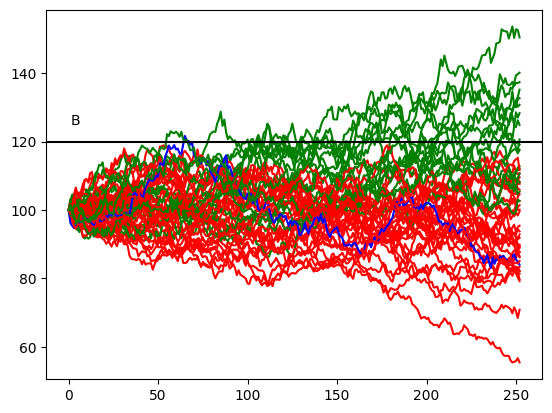

In [17]:
#up and in
for i in range(0,50):
    if(max(paths[i]) > 120):
        if(paths[i][-1] > 100):
            plt.plot(paths[i], color='green')
        else:
            plt.plot(paths[i], color='blue')
    else:
        plt.plot(paths[i],color='red')
plt.annotate('B', (1,125))
plt.axhline(y = 120, color = 'black', linestyle = '-') 
plt.show()

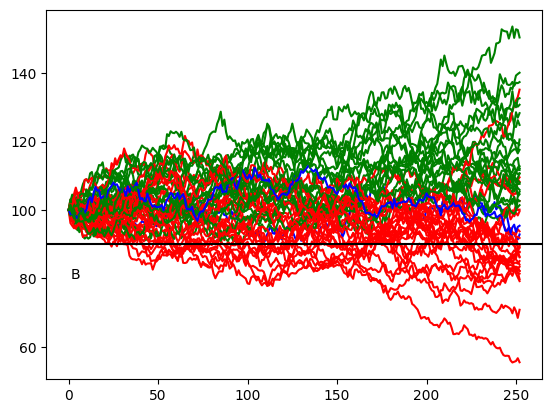

In [18]:
#down and out
for i in range(0,50):
    if(min(paths[i]) < 90):
        plt.plot(paths[i],color='red')
    else:
        if(paths[i][-1] > 100):
            plt.plot(paths[i], color='green')
        else:
            plt.plot(paths[i], color='blue')

plt.annotate('B', (1,80))
plt.axhline(y = 90, color = 'black', linestyle = '-') 
plt.show()

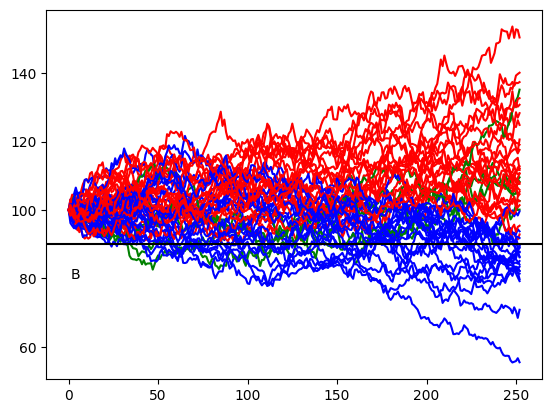

In [19]:
#down and in
for i in range(0,50):
    if(min(paths[i]) < 90):
        if(paths[i][-1] > 100):
            plt.plot(paths[i], color='green')
        else:
            plt.plot(paths[i], color='blue')
    else:
         plt.plot(paths[i], color='red')

plt.annotate('B', (1,80))
plt.axhline(y = 90, color = 'black', linestyle = '-') 
plt.show()

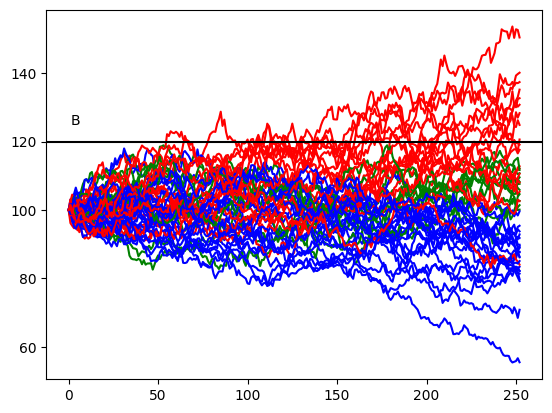

In [20]:
#up and out
for i in range(0,50):
    if(max(paths[i]) > 120):
        plt.plot(paths[i],color='red')
    else:
        if(paths[i][-1] > 100):
            plt.plot(paths[i], color='green')
        else:
            plt.plot(paths[i], color='blue')
plt.annotate('B', (1,125))
plt.axhline(y = 120, color = 'black', linestyle = '-') 
plt.show()